# Morphogen gradients

Expression of genes not only needs to be regulated in time within a cell, but needs to be coordinated across cells.
 * different cell types
 * high order structures
 * essentially all of developmental biology
 * but also in bacterial biofilms and other unexpected places. 

![image.png](figures/simulated_embryo.png)

Computational synthesis of gene expression patters in the fly embryo (from
https://dav.lbl.gov/archive/Events/SC05/Drosophilia/index.html).

## The bicoid gradient

![image.png](figures/bicoid.png)

Bicoid gradient, image by Thomas Gregor et al

The result of localized mRNA at the pole:

![image.png](figures/bicoid_nuclei.png)


The bicoid protein gradient is then read out and is responsible for patterned expression of downstream genes.

### Gradient formation by diffusion and decay

Gradients through diffusion from a localized source if the protein has a finite lifetime $\tau$.
Such diffusion is described by

$$
\frac{\partial P(x,t)}{\partial t} = D \frac{\partial^2P(x,t)}{\partial x^2} - \frac{1}{\tau} P(x,t)
$$

The second term here describes the decay with lifetime $\tau$ (without the diffusion term, this equation reduces to exponential decay).




At steady state, that is when $\frac{\partial P(x,t)}{\partial t}=0$, we have:

$$
P(x) = \tau D \frac{\partial^2P(x)}{\partial x^2}
$$

which is solved by $P(x) = Ce^{-x/\sqrt{D\tau}}$

 * Exponential decay with length scale $\sqrt{D\tau}$
 * Overall level is undetermined -> need to incorporate the source term
 * Protein is produced at the left ($x=0$) end of the embryo at rate $\alpha$
 * Production is balanced by a flux to the right. 

$$
\alpha = D\frac{dP(x)}{dx}\vert_{x=0} = D\frac{C}{\sqrt{D\tau}}=\frac{C\sqrt{D}}{\sqrt{\tau}}
$$

and hence

$$
C = \alpha\sqrt{\frac{\tau}{D}}
$$

 * $D\approx 5 \mu m^2/s$
 * $\tau = 30$min or 1800s
 
Hence we have $l = \sqrt{9000}\mu m \approx 100\mu m$

(this is somewhat more complicated in reality -- bicoid is moved around by cycles of replications).

In [1]:
# import standard libraries
import numpy as np
import matplotlib.pyplot as plt

def bicoid_change(b, dx, alpha, D, beta):
    # beta = 1/tau
    jump_rate = D/dx**2
    dbdt = np.zeros_like(b)
    # source alpha in zero bin -- contributes alpha/dx since bin has width dx
    dbdt[0] = alpha/dx - b[0]*beta - b[0]*jump_rate + b[1]*jump_rate
    # the remainder is just diffusion and the degradation term
    dbdt[1:-1] = -2*jump_rate*b[1:-1]+jump_rate*(b[0:-2] + b[2:]) - beta*b[1:-1]
    dbdt[-1] = -jump_rate*b[-1] + jump_rate*b[-2] - beta*b[-1]
    return dbdt


In [2]:
L = 500       #micrometers
D = 5         #micrometer^2/s
tau = 60*30   #30min, in seconds
alpha = 1     #the production rate doesn't matter, just rescales the result

In [3]:
N = 100    # the number of discrete time steps we will use
dx = L/N    # the width of the bins

In [4]:
b = np.zeros(N)
dt = .1 # number of seconds per time step
tmax = 60*100
t=0

while t<tmax:
    b += dt*bicoid_change(b, dx, alpha, D, 1/tau)
    t += dt

Text(0, 0.5, 'Bicoid concentration [a.u.]')

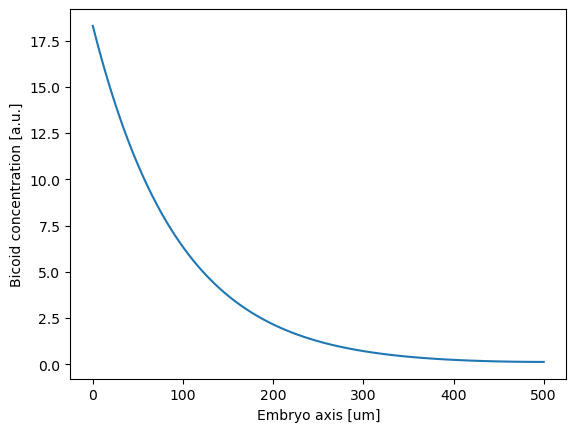

In [5]:
plt.plot(L*np.linspace(0,1,N), b)
plt.xlabel('Embryo axis [um]')
plt.ylabel('Bicoid concentration [a.u.]')

length scale: 94.86832980505137


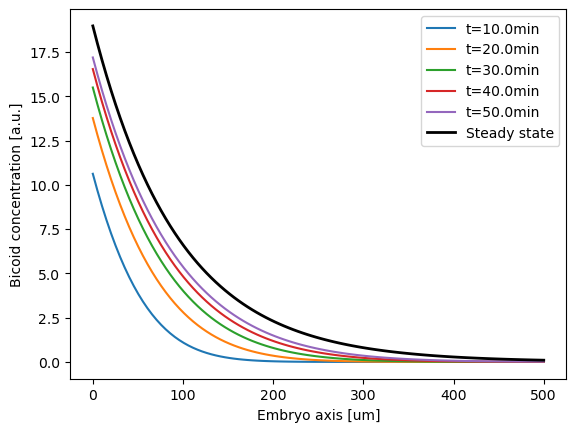

In [6]:
b = np.zeros(N)
x = L*np.linspace(0,1,N)

plot_dt = 60*10
for i in range(5):
    t=0
    while t<plot_dt:
        b += dt*bicoid_change(b, dx, alpha, D, 1/tau)
        t += dt
    plt.plot(x, b, label=f't={(i+1)*plot_dt/60}min')
plt.xlabel('Embryo axis [um]')
plt.ylabel('Bicoid concentration [a.u.]')


plt.plot(x, alpha*np.sqrt(tau/D)*np.exp(-x/np.sqrt(D*tau)), lw=2, c='k', label="Steady state")
plt.legend()
print("length scale:",np.sqrt(D*tau))

Text(0, 0.5, 'expression read-out')

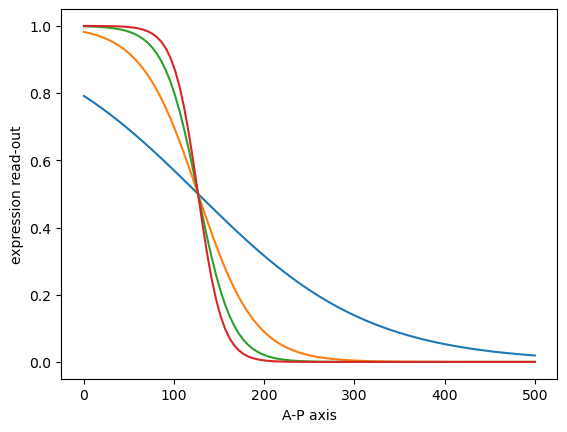

In [7]:
def hill_curve(c, n, k):
    return c**n/(c**n + k**n)

c = alpha*np.sqrt(tau/D)*np.exp(-x/np.sqrt(D*tau))
for n in [1,3,5,7]:
    plt.plot(x, hill_curve(c, n, 5))
plt.xlabel('A-P axis')
plt.ylabel('expression read-out')
